In [1]:
import pandas as pd
import numpy as np
import librosa 

import seaborn as sn
import matplotlib.pyplot as plt
import IPython.display as ipd #palying audio
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
import os
import csv
import soundfile
import sklearn
from matplotlib.colors import Normalize
import glob
from scipy.stats import kurtosis, skew
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_validate
import pickle
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFE

In [2]:
path = os.chdir('C:/Users/makye/OneDrive/Documents/Career/BeCode/study/Data_preprocessing/audioProcessing/fan')
print(os.getcwd())

C:\Users\makye\OneDrive\Documents\Career\BeCode\study\Data_preprocessing\audioProcessing\fan


In [3]:
# load dataset

def loadData():
    
    #Pulling the data
    path = 'martin_fan40.csv'
    df = pd.read_csv(path)
    return df

df = loadData()
df


,0,1,2,3,4,5,6,7,8,9,...,226,227,228,229,230,231,232,233,234,target
0,0.521068,0.070138,1.0,0.245642,0.465831,0.024667,1.103050e-16,2.026740,0.089876,0.000809,...,-3.753345,0.622553,-4.079293,1.717946,-3.843680,-0.487058,-2.564343,0.322444,0.917312,0
1,0.299771,0.017528,1.0,0.265553,0.213866,0.019055,1.071334e-16,2.098461,0.071708,0.000670,...,-8.349066,1.373964,-0.905749,6.431675,-3.730001,-1.026688,-10.680933,-1.292613,-0.065263,0
2,0.572170,0.104147,1.0,0.228203,0.538895,0.024145,1.138664e-16,2.024810,0.086656,0.001122,...,-3.709635,0.854858,-3.137182,2.921020,-4.522874,0.525052,-2.096044,1.620852,-0.046381,0
3,0.267712,0.011508,1.0,0.264279,0.172998,0.018542,6.822672e-17,1.953995,0.069519,0.000759,...,-8.420304,1.540284,1.031072,7.787944,-4.283603,-2.514720,-11.966341,-0.660952,0.172838,0
4,0.618555,0.082517,1.0,0.228066,0.603731,0.027033,7.384542e-17,5.976659,0.133491,0.000522,...,-3.783180,0.049001,-6.064190,0.445893,-2.652442,-0.507077,-0.795199,1.559489,-1.077695,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16645,0.400031,0.031603,1.0,0.258837,0.325987,0.001638,7.829068e-18,0.120201,0.004660,0.000151,...,-3.875598,3.577491,1.672403,6.316190,-4.967726,-1.522773,-11.896156,0.828754,2.924010,1
16646,0.540105,0.088919,1.0,0.241641,0.502585,0.001934,1.016532e-17,0.140854,0.006783,0.000133,...,-2.293127,0.059403,-3.409543,3.455919,-2.844171,3.320866,-7.180709,0.096450,-0.153845,1
16647,0.561690,0.066326,1.0,0.238738,0.524885,0.001950,8.418404e-18,0.207043,0.008274,0.000123,...,-3.556032,-0.587981,-3.043593,3.426149,-2.318453,3.284101,-7.141550,-0.408158,0.170186,1
16648,0.448597,0.019700,1.0,0.252496,0.387905,0.001632,8.850527e-18,0.114017,0.004414,0.000173,...,-7.400671,-0.611357,-0.405908,7.716073,-2.470002,0.187876,-13.708086,-4.265595,-2.957150,1


In [4]:
#Creating header for features
header = ''

variables = ['chroma_stft', 'mel_spec',  'rms_f',  'spec_cent', 'spec_bw', 'rolloff', 'zcrf']

for i in variables:
    
    header += f' mean_{i}'
    header += f' min_{i}'
    header += f' max_{i}'
    header += f' std_{i}'
    header += f' median_{i}'
    
for i in range(1, 41):
    header += f' mean_mfcc{i}'
        
for i in range(1, 41):
    header += f' min_mfcc{i}'
        
for i in range(1, 41):
    header += f' max_mfcc{i}'
        
for i in range(1, 41):
    header += f' std_mfcc{i}'
        
for i in range(1, 41):
    header += f' median_mfcc{i}'
    
header = header.split()

In [5]:
# Adding header to features

features = df.iloc[:, :-1] #Selecting features
features.columns = header # Adding header to features
features

,mean_chroma_stft,min_chroma_stft,max_chroma_stft,std_chroma_stft,median_chroma_stft,mean_mel_spec,min_mel_spec,max_mel_spec,std_mel_spec,median_mel_spec,...,median_mfcc31,median_mfcc32,median_mfcc33,median_mfcc34,median_mfcc35,median_mfcc36,median_mfcc37,median_mfcc38,median_mfcc39,median_mfcc40
0,0.521068,0.070138,1.0,0.245642,0.465831,0.024667,1.103050e-16,2.026740,0.089876,0.000809,...,-1.183580,-3.753345,0.622553,-4.079293,1.717946,-3.843680,-0.487058,-2.564343,0.322444,0.917312
1,0.299771,0.017528,1.0,0.265553,0.213866,0.019055,1.071334e-16,2.098461,0.071708,0.000670,...,-7.508953,-8.349066,1.373964,-0.905749,6.431675,-3.730001,-1.026688,-10.680933,-1.292613,-0.065263
2,0.572170,0.104147,1.0,0.228203,0.538895,0.024145,1.138664e-16,2.024810,0.086656,0.001122,...,-1.553520,-3.709635,0.854858,-3.137182,2.921020,-4.522874,0.525052,-2.096044,1.620852,-0.046381
3,0.267712,0.011508,1.0,0.264279,0.172998,0.018542,6.822672e-17,1.953995,0.069519,0.000759,...,-8.764864,-8.420304,1.540284,1.031072,7.787944,-4.283603,-2.514720,-11.966341,-0.660952,0.172838
4,0.618555,0.082517,1.0,0.228066,0.603731,0.027033,7.384542e-17,5.976659,0.133491,0.000522,...,-0.641905,-3.783180,0.049001,-6.064190,0.445893,-2.652442,-0.507077,-0.795199,1.559489,-1.077695
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16645,0.400031,0.031603,1.0,0.258837,0.325987,0.001638,7.829068e-18,0.120201,0.004660,0.000151,...,-4.379579,-3.875598,3.577491,1.672403,6.316190,-4.967726,-1.522773,-11.896156,0.828754,2.924010
16646,0.540105,0.088919,1.0,0.241641,0.502585,0.001934,1.016532e-17,0.140854,0.006783,0.000133,...,-0.234316,-2.293127,0.059403,-3.409543,3.455919,-2.844171,3.320866,-7.180709,0.096450,-0.153845
16647,0.561690,0.066326,1.0,0.238738,0.524885,0.001950,8.418404e-18,0.207043,0.008274,0.000123,...,-0.604638,-3.556032,-0.587981,-3.043593,3.426149,-2.318453,3.284101,-7.141550,-0.408158,0.170186
16648,0.448597,0.019700,1.0,0.252496,0.387905,0.001632,8.850527e-18,0.114017,0.004414,0.000173,...,-4.669513,-7.400671,-0.611357,-0.405908,7.716073,-2.470002,0.187876,-13.708086,-4.265595,-2.957150


In [6]:
#defining features and target/scaling

X = features
y = df.iloc[:, -1]

scaler = StandardScaler()
# keep our unscaled features just in case we need to process them alternatively
X_scaled = scaler.fit_transform(X)

scaler = MinMaxScaler()
# keep our unscaled features just in case we need to process them alternatively
X_minmax = scaler.fit_transform(X)


In [7]:
############# Unscaled test/train set #############
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=42
)

############ Standard Scaled test/train set ###########
# The labels/classes (y_train, y_test) never change, keep old values 
X_train_scaled, X_test_scaled, _, _ = train_test_split(
    X_scaled, 
    y, 
    test_size=0.2, 
    random_state=42
)

############# MinMax Scaled test/train set ###############
# The labels/classes (y_train, y_test) never change, keep old values 
X_train_minmax, X_test_minmax, _, _ = train_test_split(
    X_scaled, 
    y, 
    test_size=0.2, 
    random_state=42
)

In [8]:
#Unscaled:

classification_models = [
    KNeighborsClassifier(),#(3),
    SVC(kernel='linear'),#, C=0.025),
    SVC(kernel='rbf'),
    DecisionTreeClassifier(),#max_depth=5),
    RandomForestClassifier(),#max_depth=5, n_estimators=10, max_features=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

scores = []
for model in classification_models:
    model.fit(X_train, y_train) #Unscaled train
    score = model.score(X_test, y_test) #unscaled test
    model_name = type(model).__name__
    if model_name=='SVC' and model.kernel=='rbf': model_name+=' RBF kernel'
    scores.append((model_name,(f'{100*score:.2f}%')))
# Make it pretty
scores_df = pd.DataFrame(scores,columns=['Classifier','Accuracy Score'])
scores_df.sort_values(by='Accuracy Score',axis=0,ascending=False)

C:\Users\makye\anaconda3\envs\AudioProcessing\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


,Classifier,Accuracy Score
4,RandomForestClassifier,94.47%
5,AdaBoostClassifier,89.82%
1,SVC,89.58%
3,DecisionTreeClassifier,89.19%
7,QuadraticDiscriminantAnalysis,80.87%
0,KNeighborsClassifier,79.85%
2,SVC RBF kernel,75.77%
6,GaussianNB,68.86%


In [9]:
#Scaled
classification_models = [
    KNeighborsClassifier(),#(3),
    SVC(kernel='linear'),#, C=0.025),
    SVC(kernel='rbf'),
    DecisionTreeClassifier(),#max_depth=5),
    RandomForestClassifier(),#max_depth=5, n_estimators=10, max_features=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

scores = []
for model in classification_models:
    model.fit(X_train_scaled, y_train) #scaled train
    score = model.score(X_test_scaled, y_test) #Scaled test
    model_name = type(model).__name__
    if model_name=='SVC' and model.kernel=='rbf': model_name+=' RBF kernel'
    scores.append((model_name,(f'{100*score:.2f}%')))
# Make it pretty
scores_df = pd.DataFrame(scores,columns=['Classifier','Accuracy Score'])
scores_df.sort_values(by='Accuracy Score',axis=0,ascending=False)

C:\Users\makye\anaconda3\envs\AudioProcessing\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


,Classifier,Accuracy Score
2,SVC RBF kernel,95.68%
4,RandomForestClassifier,94.77%
0,KNeighborsClassifier,91.89%
1,SVC,91.80%
5,AdaBoostClassifier,89.79%
3,DecisionTreeClassifier,88.92%
7,QuadraticDiscriminantAnalysis,86.58%
6,GaussianNB,68.47%


In [14]:
#RandomForest Classifier (unScaled features)
classifier = RandomForestClassifier(random_state=42, n_estimators=35)
# classifier  = SVC()
classifier.fit(X_train, y_train) #scaled train
# score = model.score(X_test_scaled, y_test)
y_pred = classifier.predict(X_test)

In [15]:
def Metrics(y_test, y_pred):
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    print(accuracy_score(y_test, y_pred))
    
Metrics(y_test, y_pred)

[[2490   17]
 [ 171  652]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      2507
           1       0.97      0.79      0.87       823

    accuracy                           0.94      3330
   macro avg       0.96      0.89      0.92      3330
weighted avg       0.95      0.94      0.94      3330

0.9435435435435435


Text(69.0, 0.5, 'True Values')

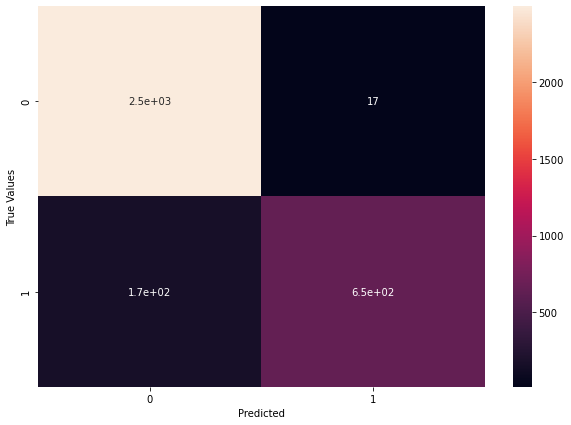

In [16]:
#Plotting confusion matrix
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('True Values')

In [82]:
#Cross Validation????
cv = cross_validate(classifier, X_scaled, y, cv=5)
print(cv['test_score'])
print(cv['test_score'].mean())

[0.47496947 0.86853887 0.96091205 0.9784202  0.95969055]
0.8485062289622551


In [17]:
#Save model
filename = 'finalized_model_fanRF79USc.sav'
pickle.dump(classifier, open(filename, 'wb'))
 

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00099
Feature: 3, Score: 0.00101
Feature: 4, Score: 0.00102
Feature: 5, Score: 0.00103
Feature: 6, Score: 0.00107
Feature: 7, Score: 0.00109
Feature: 8, Score: 0.00112
Feature: 9, Score: 0.00112
Feature: 10, Score: 0.00112
Feature: 11, Score: 0.00113
Feature: 12, Score: 0.00114
Feature: 13, Score: 0.00115
Feature: 14, Score: 0.00117
Feature: 15, Score: 0.00117
Feature: 16, Score: 0.00119
Feature: 17, Score: 0.00120
Feature: 18, Score: 0.00121
Feature: 19, Score: 0.00121
Feature: 20, Score: 0.00124
Feature: 21, Score: 0.00125
Feature: 22, Score: 0.00126
Feature: 23, Score: 0.00129
Feature: 24, Score: 0.00132
Feature: 25, Score: 0.00134
Feature: 26, Score: 0.00135
Feature: 27, Score: 0.00136
Feature: 28, Score: 0.00137
Feature: 29, Score: 0.00137
Feature: 30, Score: 0.00138
Feature: 31, Score: 0.00138
Feature: 32, Score: 0.00139
Feature: 33, Score: 0.00142
Feature: 34, Score: 0.00142
Feature: 35, Score: 0.00142
Fe

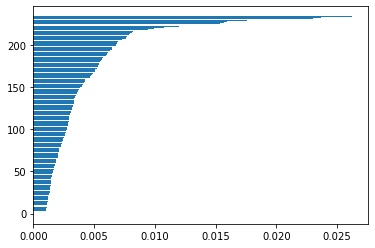

In [18]:
# Calculate & plot Feature importance 
importance = list(classifier.feature_importances_)
importance.sort()

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
plt.barh([x for x in range(len(importance))], importance)
plt.show()

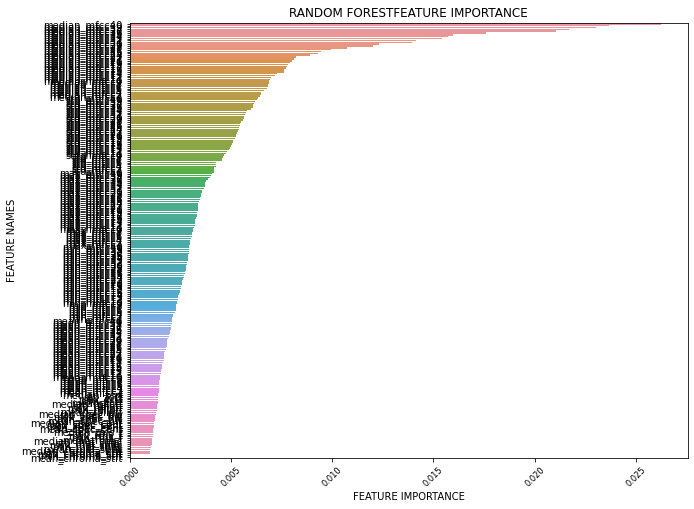

In [19]:
# Calculating and plotting feature importance

def plot_feature_importance(importance,names,model_type):

                #Create arrays from feature importance and feature names
                feature_importance = np.array(importance)
                feature_names = np.array(names)

                #Create a DataFrame using a Dictionary
                data={'feature_names':feature_names,'feature_importance':feature_importance}
                fi_df = pd.DataFrame(data)

                #Sort the DataFrame in order decreasing feature importance
                fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

                #Define size of bar plot
                plt.figure(figsize=(10,8))
                #Plot Searborn bar chart
                sn.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
                #Add chart labels
                plt.tick_params(axis='x', which='major', labelsize= 'small', rotation=45)
                plt.title(model_type + 'FEATURE IMPORTANCE')
                plt.xlabel('FEATURE IMPORTANCE')
                plt.ylabel('FEATURE NAMES')


# calling function
plot_feature_importance(importance, features.columns,'RANDOM FOREST')


In [20]:
# Feature selection by feature importance of random forest classifier

#Selecting important features
sel = SelectFromModel(RandomForestClassifier(n_estimators=150, random_state=42, n_jobs=-1))
sel.fit(X_train, y_train)
sel.get_support()#Returns array of boolean values with importance status

array([ True, False, False,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True, False,
       False, False,  True, False, False, False, False,  True,  True,
        True, False,  True,  True, False, False,  True,  True,  True,
        True, False, False, False,  True,  True,  True, False,  True,
       False,  True, False, False,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
        True,  True, False, False,  True,  True,  True, False,  True,
        True, False, False,  True, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False,  True, False, False, False, False, False,
       False, False,

In [21]:
#Feature columns
X_train.columns

Index(['mean_chroma_stft', 'min_chroma_stft', 'max_chroma_stft',
       'std_chroma_stft', 'median_chroma_stft', 'mean_mel_spec',
       'min_mel_spec', 'max_mel_spec', 'std_mel_spec', 'median_mel_spec',
       ...
       'median_mfcc31', 'median_mfcc32', 'median_mfcc33', 'median_mfcc34',
       'median_mfcc35', 'median_mfcc36', 'median_mfcc37', 'median_mfcc38',
       'median_mfcc39', 'median_mfcc40'],
      dtype='object', length=235)

In [22]:
#retained features
retained = X_train.columns[sel.get_support()]
retained

Index(['mean_chroma_stft', 'std_chroma_stft', 'median_chroma_stft',
       'mean_mel_spec', 'max_mel_spec', 'std_mel_spec', 'median_mel_spec',
       'mean_rms_f', 'min_rms_f', 'max_rms_f', 'std_rms_f', 'median_rms_f',
       'min_spec_cent', 'mean_spec_bw', 'mean_rolloff', 'min_rolloff',
       'max_rolloff', 'median_rolloff', 'mean_zcrf', 'std_zcrf', 'median_zcrf',
       'mean_mfcc1', 'mean_mfcc2', 'mean_mfcc6', 'mean_mfcc7', 'mean_mfcc8',
       'mean_mfcc10', 'mean_mfcc12', 'mean_mfcc15', 'mean_mfcc16',
       'mean_mfcc17', 'mean_mfcc19', 'mean_mfcc20', 'mean_mfcc21',
       'mean_mfcc22', 'mean_mfcc23', 'mean_mfcc24', 'mean_mfcc25',
       'mean_mfcc26', 'mean_mfcc29', 'mean_mfcc30', 'mean_mfcc33',
       'mean_mfcc34', 'mean_mfcc35', 'mean_mfcc37', 'mean_mfcc38', 'min_mfcc1',
       'min_mfcc7', 'min_mfcc22', 'max_mfcc2', 'max_mfcc6', 'max_mfcc15',
       'max_mfcc29', 'median_mfcc1', 'median_mfcc2', 'median_mfcc3',
       'median_mfcc6', 'median_mfcc7', 'median_mfcc8', 'median

In [23]:
#Number of retained features
len(retained)

77

In [24]:
# overall mean importance of selected features
print(np.mean(sel.estimator_.feature_importances_))

#features above the mean importance carry more weight
sel.estimator_.feature_importances_

0.00425531914893617


array([0.01149346, 0.00388651, 0.        , 0.00526882, 0.00785082,
       0.02614065, 0.        , 0.00757681, 0.02425374, 0.00872612,
       0.02302204, 0.01141909, 0.0133645 , 0.00772063, 0.0267657 ,
       0.00422908, 0.00429423, 0.00238404, 0.00331051, 0.00322713,
       0.00518865, 0.00258385, 0.00130683, 0.00187019, 0.00378642,
       0.00786547, 0.00608911, 0.00711643, 0.00306582, 0.00592306,
       0.00593497, 0.0015844 , 0.00373793, 0.00704112, 0.00515581,
       0.00660951, 0.00625379, 0.0042127 , 0.00249144, 0.00253622,
       0.00860322, 0.00498215, 0.00527332, 0.00266199, 0.00497956,
       0.0035483 , 0.00494519, 0.00420408, 0.00297403, 0.01262676,
       0.00602631, 0.00471355, 0.00381505, 0.00572905, 0.00690134,
       0.00734624, 0.01925983, 0.00577727, 0.00757346, 0.00607635,
       0.00548359, 0.00411879, 0.00348997, 0.00561182, 0.00545744,
       0.00326022, 0.00289158, 0.00906868, 0.0101291 , 0.00697927,
       0.00298632, 0.00832479, 0.00604589, 0.00237576, 0.00234

In [25]:
#function to call alogarithm for RandomForest
def run_randomForest(X_train, X_test, y_train, y_test):
    clf = RandomForestClassifier(n_estimators=35, random_state=42, n_jobs=-1)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    print('Accuracy:', accuracy_score(y_test, y_pred))

In [26]:
%%time
#Calling function on untrimmed dataset

run_randomForest(X_train, X_test, y_train, y_test)

[[2490   17]
 [ 171  652]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      2507
           1       0.97      0.79      0.87       823

    accuracy                           0.94      3330
   macro avg       0.96      0.89      0.92      3330
weighted avg       0.95      0.94      0.94      3330

Accuracy: 0.9435435435435435
Wall time: 637 ms


In [27]:
%%time

X_train_rfc = sel.transform(X_train)
X_test_rfc = sel.transform(X_test)

#Calling function on trimmed dataset (with selected features)
run_randomForest(X_train_rfc, X_test_rfc, y_train, y_test)

[[2481   26]
 [ 136  687]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      2507
           1       0.96      0.83      0.89       823

    accuracy                           0.95      3330
   macro avg       0.96      0.91      0.93      3330
weighted avg       0.95      0.95      0.95      3330

Accuracy: 0.9513513513513514
Wall time: 416 ms


In [ ]:
#Random Forest unscaled, SVC RBF kernel(scaled)

In [11]:
#create overall dataframe 

#Append target to features dataframe
new_df = pd.concat([features, y], axis=1)

#Adding column 'machine ID' (fan = 3)
new_df['Machine_ID'] = 3
new_df


#CSV of dataFrame

def createCsv(df):
    

    df.to_csv('martin_fan40.csv', index=False)
    
createCsv(new_df)

In [ ]:

# some time later...
 
# # load the model from disk
# loaded_model = pickle.load(open(filename, 'rb'))
# result = loaded